<a href="https://colab.research.google.com/github/susmitds/Amazon_Market_Data_Analytics/blob/main/2_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [ ]:
data=pd.read_csv('D:/Workspace/Projects/MarketDataAnalytics/clean.csv')

In [ ]:
data['Total Price'].describe(percentiles = [0.25,0.50,0.75,0.85,0.90,0.99,1])

count      2769.000000
mean       1720.823926
std        6280.335048
min           0.000000
25%         239.000000
50%         409.000000
75%         899.000000
85%        1475.800000
90%        2086.200000
99%       29316.120000
100%     109999.000000
max      109999.000000
Name: Total Price, dtype: float64

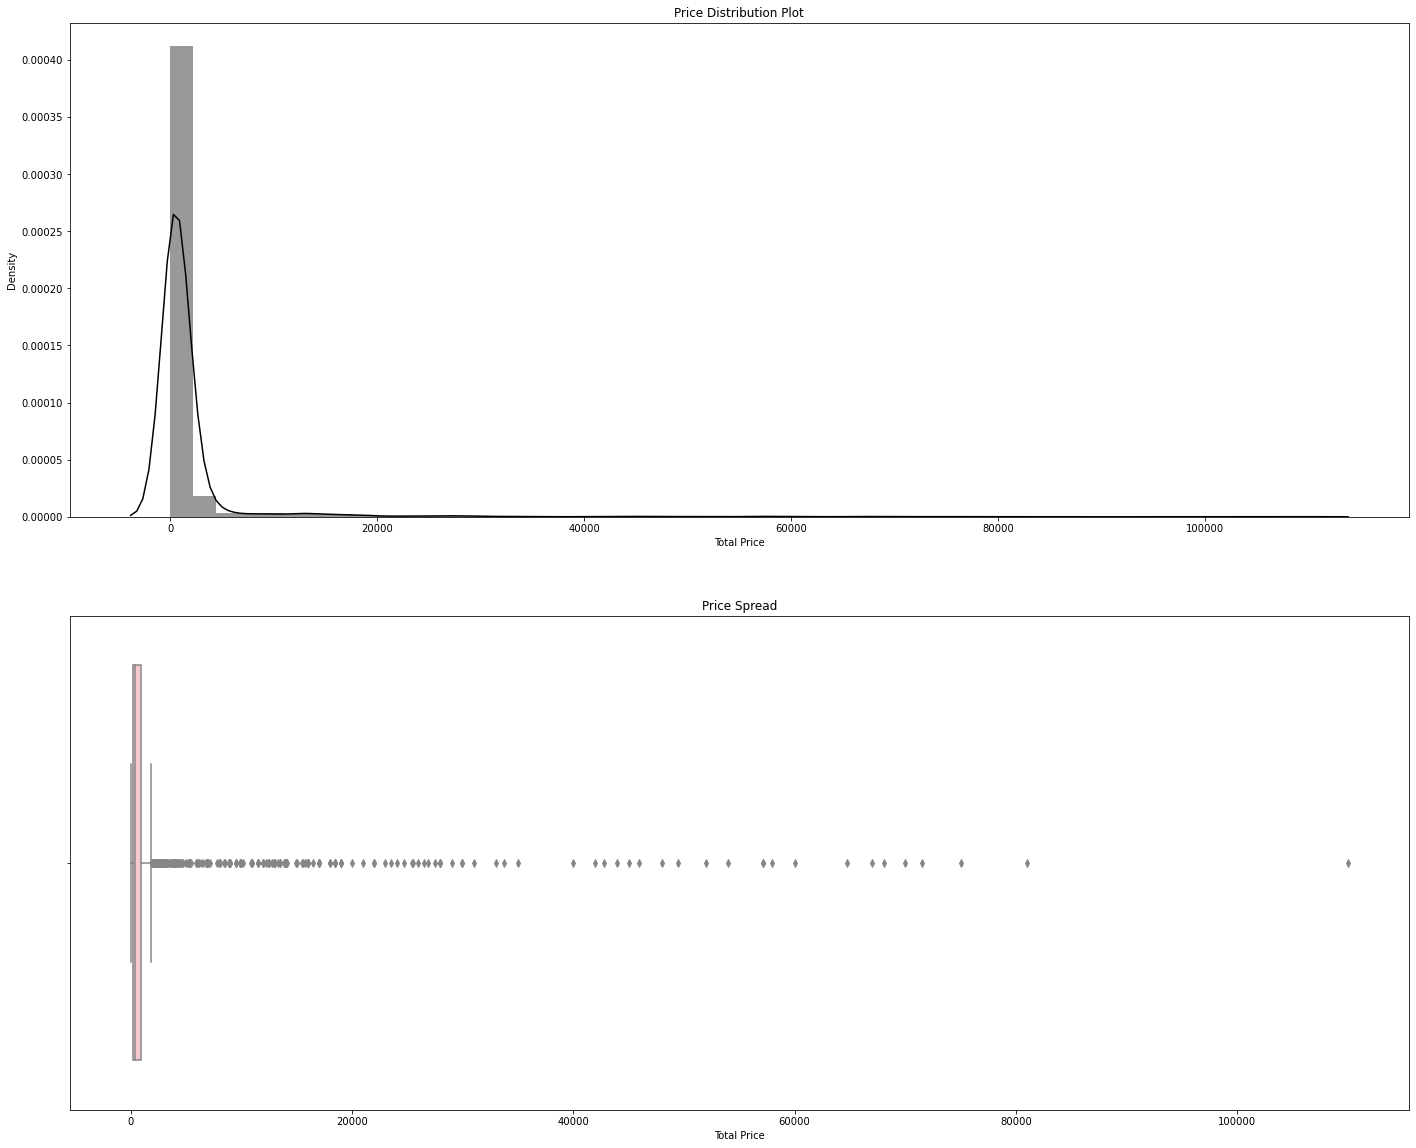

In [ ]:
plt.figure(figsize=(24,20))

plt.subplot(2,1,1)
plt.title('Price Distribution Plot')
sns.distplot(data['Total Price'],color='black')

plt.subplot(2,1,2)
plt.title('Price Spread')
sns.boxplot(data['Total Price'],color='pink')

plt.show()

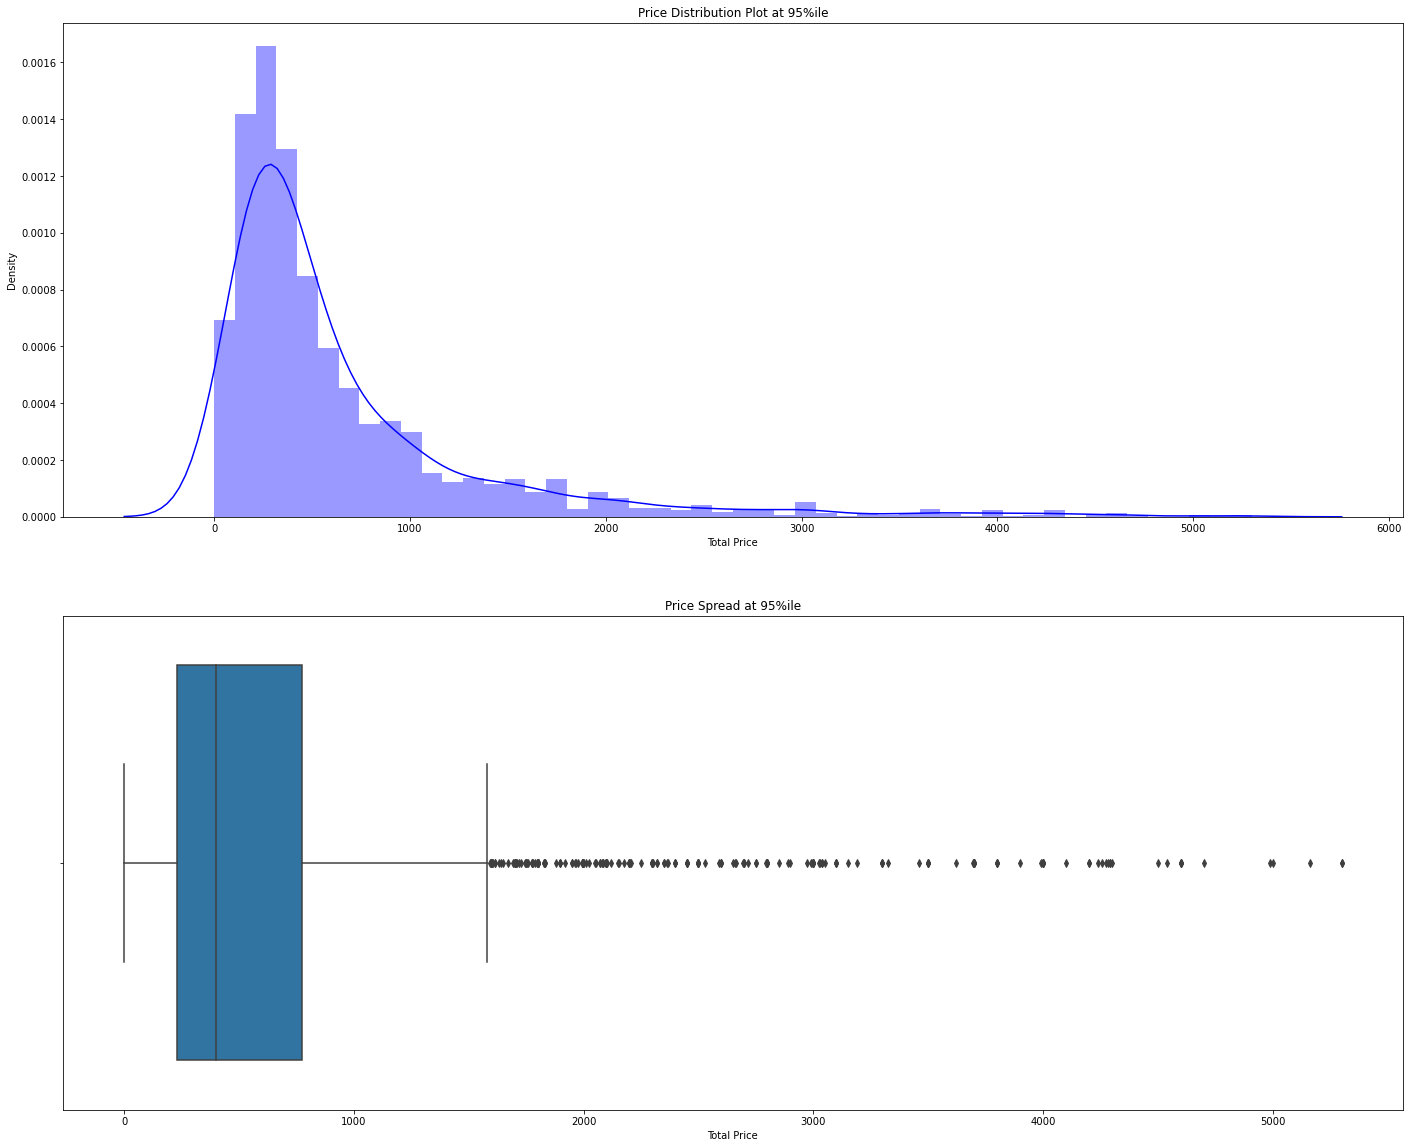

In [ ]:
plt.figure(figsize=(24,20))

plt.subplot(2,1,1)
plt.title('Price Distribution Plot at 95%ile')
sns.distplot(data[data['Total Price']<=np.percentile(data['Total Price'],95)]['Total Price'],color='blue')

plt.subplot(2,1,2)
plt.title('Price Spread at 95%ile')
sns.boxplot(data[data['Total Price']<=np.percentile(data['Total Price'],95)]['Total Price'])

plt.show()

In [ ]:
def graph_d(g,double_col,x_size,y_size,var_list,mod):
    plt.figure(figsize=(x_size,y_size))
    if type(var_list) is list:
        for i in range(len(var_list)):
            if double_col==0:
                plt.subplot(len(var_list),1,i+1)
            elif double_col==1:
                plt.subplot(int(np.ceil(len(var_list)/2)),2,i+1)
            draw(g,var_list[i],mod,i)
    else:
        draw(g,var_list,mod,0)
def draw(g,var,mod,i):
    z=(mod[i] if len(mod)>=i else mod[0]) if (type(mod) is list) else mod
    if g=='hist':
        plt.title(var+' histogram')
        (data[var].value_counts().plot(kind='bar', color=np.random.rand(len(data[var]),3))).set(xlabel = var, ylabel='Frequency of '+var)
    elif g=='line':
        plt.title(var+' vs price')
        sns.lineplot(x=data[data[var]<=np.percentile(data[var],z)][var],y=data['Total Price'],color=np.random.rand(3,))
    elif g=='box':
        plt.title(var+' price spread')
        sns.boxplot(x=data[var],y=data['Total Price'], palette=(z))
    elif g=='bar':
        plt.title(var+' mean price')
        ((data.groupby([var])['Total Price'].mean().sort_values(ascending = False)).plot.bar(color=np.random.rand(len(data[var]),3))).set(xlabel = var, ylabel='Mean price of '+var)
    plt.tight_layout()

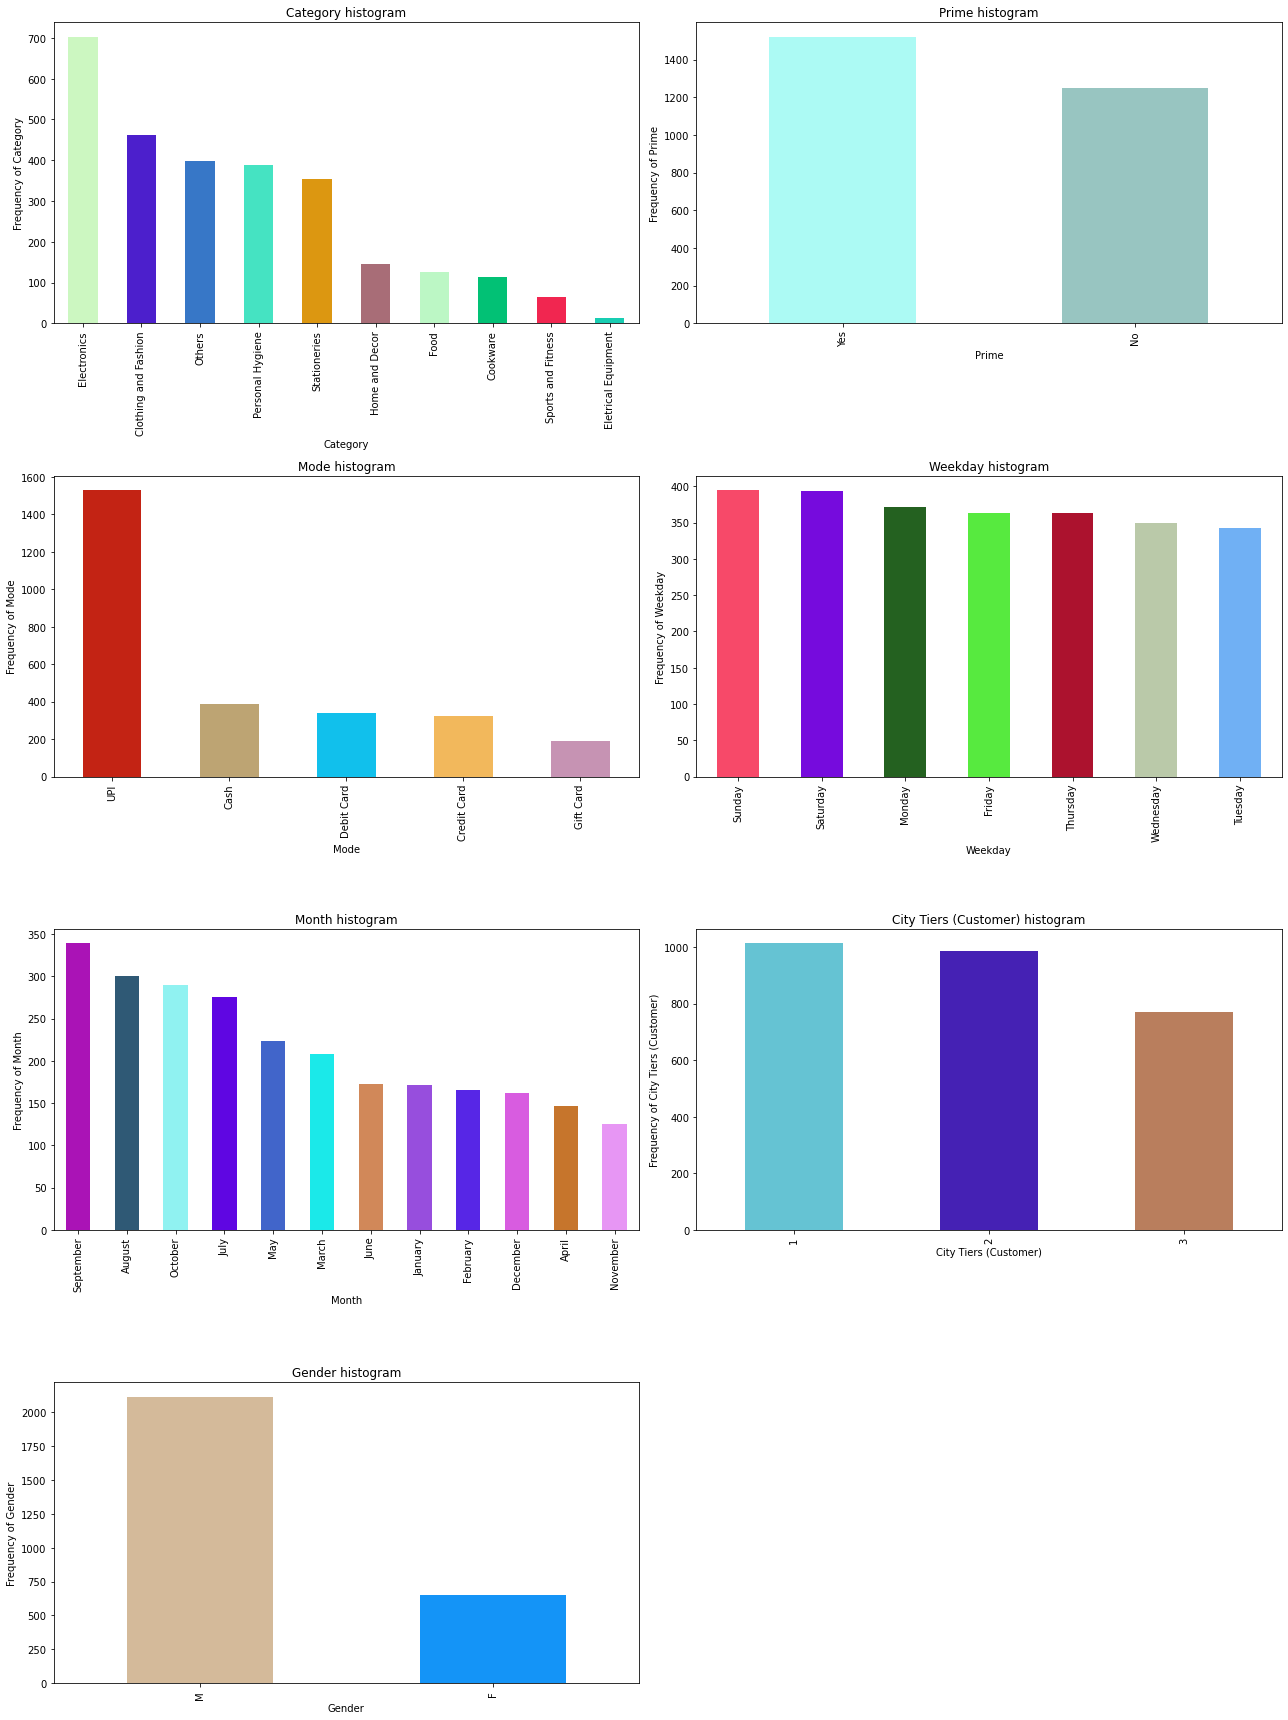

In [ ]:
graph_d('hist',1,18,24,['Category','Prime','Mode','Weekday','Month', 'City Tiers (Customer)','Gender'],0)